In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from neuromaps.datasets import fetch_fslr
from heteromodes.plotting import plot_heatmap, plot_brain
from heteromodes.utils import unmask


In [2]:
n_comps = 4

In [ ]:
with h5py.File(f"{PROJ_DIR}/data/empirical/HCP_nsubj-255_fc_parc-None_fsLR4k_hemi-L.h5", "r") as f:
    emp_fc = f['fc_group'][:]

with h5py.File(f"{PROJ_DIR}/data/empirical/HCP_nsubj-255_complexPhase_parc-None_fsLR4k_hemi-L_freql-0.01_freqh-0.1.h5", "r") as f:
    phase_cpcs = f['phase_cpcs_group'][:]

    svals_emp = f['svals_group'][:n_comps]
    phase_cpc_comb = np.sum(phase_cpcs[:, :n_comps] * svals_emp, axis=1) / np.sum(svals_emp)

    medmask = f['medmask'][:]

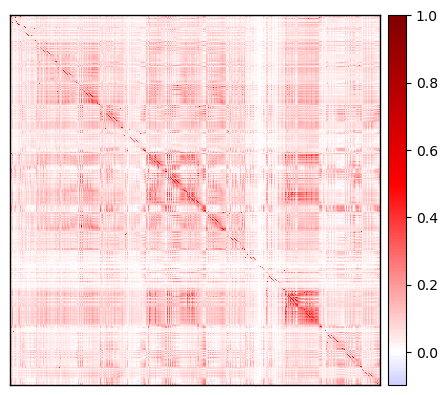

In [4]:
plot_heatmap(emp_fc, center=0, cmap="seismic", cbar=True, square=True)
plt.show()

Text(0.5, 1.0, '1st Complex PC')

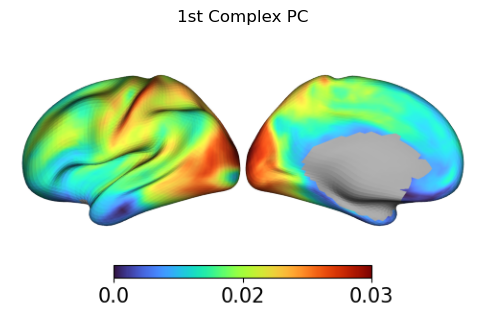

In [18]:
surf_infl = fetch_fslr("4k")["inflated"][0]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_brain(surf_infl, unmask(phase_cpc1, medmask), cmap="turbo", cbar=True, ax=ax)
plt.title("1st Complex PC")

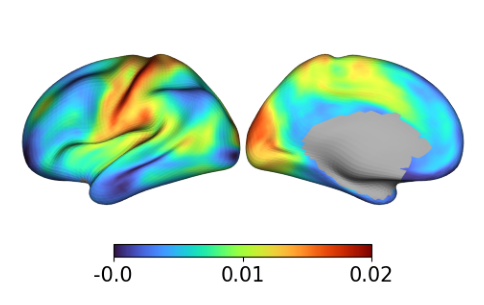

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_brain(surf_infl, unmask(phase_cpc_comb, medmask), cmap="turbo", cbar=True, ax=ax)